# Spark Funds Investment
The business objectives and goals of data analysis are pretty straightforward.

Business objective: The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

Goals of data analysis: Your goals are divided into three sub-goals:

Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.

Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.

Sector analysis: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)
        

In [3]:
#importing the important libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
companies = pd.read_csv('companies.csv', engine ='python')
rounds2 = pd.read_csv('rounds2.csv', engine ='python')


In [3]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [4]:
#How many unique companies are present in rounds2?
temp1=rounds2['company_permalink'].str.lower().nunique()
print(temp1)

66368


In [5]:
#How many unique companies are present in the companies file?
temp2=companies['permalink'].str.lower().nunique()
print(temp2)

66368


In [6]:
#In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
#Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.
df1= pd.DataFrame(companies.permalink.str.lower().unique())
df2= pd.DataFrame(rounds2.company_permalink.str.lower().unique())
df1.equals(df2)

True

In [8]:
#Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame.
#Name the merged frame master_frame.
#How many observations are present in master_frame ?

companies['permalink']=companies['permalink'].str.lower()
rounds2['permalink']= rounds2['company_permalink'].str.lower()
rounds2.drop('company_permalink', axis='columns', inplace=True)
master_frame = pd.merge(rounds2, companies, how='left', on='permalink' )

In [9]:
master_frame.shape

(114949, 15)

In [10]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   funding_round_permalink  114949 non-null  object 
 1   funding_round_type       114949 non-null  object 
 2   funding_round_code       31140 non-null   object 
 3   funded_at                114949 non-null  object 
 4   raised_amount_usd        94959 non-null   float64
 5   permalink                114949 non-null  object 
 6   name                     114948 non-null  object 
 7   homepage_url             108815 non-null  object 
 8   category_list            111539 non-null  object 
 9   status                   114949 non-null  object 
 10  country_code             106271 non-null  object 
 11  state_code               104003 non-null  object 
 12  region                   104782 non-null  object 
 13  city                     104785 non-null  object 
 14  foun

In [11]:
#null values
master_frame.isnull().sum()

funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [12]:
#drop unnessasary columns
master_frame=master_frame.drop(['funding_round_code','status','state_code','region','city','founded_at','homepage_url'],axis=1)

In [13]:
master_frame.isnull().sum()

funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
category_list               3410
country_code                8678
dtype: int64

In [14]:
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,IND
1,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,CHN


In [15]:
#removing null value rows
master_frame=master_frame[~(master_frame['raised_amount_usd'].isnull())]

In [16]:
master_frame=master_frame[~(master_frame['category_list'].isnull())]
master_frame=master_frame[~(master_frame['country_code'].isnull())]

In [17]:
master_frame.isnull().sum()

funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
permalink                  0
name                       1
category_list              0
country_code               0
dtype: int64

In [18]:
# percentage of data retained
print(round(100*(len(master_frame)/114949)),2)

77 2


In [321]:
#finding the no. of investment in each funding type
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [322]:
#filtering out the dataset based on the funding type: seed,angel,venture,private_equity
master_frame=master_frame[(master_frame['funding_round_type']=='seed') | (master_frame['funding_round_type']=='angel') | (master_frame['funding_round_type']=='venture') | (master_frame['funding_round_type']=='private_equity')]

In [323]:
master_frame['funding_round_type'].value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [324]:
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,IND
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,CHN
7,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN


In [325]:
#converting the amount to million$
master_frame['raised_amount_usd']=master_frame['raised_amount_usd']/1000000

In [326]:
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,/organization/-fame,#fame,Media,IND
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,/organization/0-6-com,0-6.com,Curated Web,CHN
7,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,0.043360,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN


In [327]:
#Calculate the most representative value of the investment amount 
df=master_frame.groupby('funding_round_type')
df.raised_amount_usd.mean()


funding_round_type
angel              0.971574
private_equity    73.938486
seed               0.747794
venture           11.724223
Name: raised_amount_usd, dtype: float64

In [328]:
#retaining only venture type
master_frame=master_frame[master_frame.funding_round_type=='venture']

In [329]:
#grouping the data by country_code to find the countries wher amount of investment is maximun
df=master_frame.groupby('country_code')
df.raised_amount_usd.sum().sort_values(ascending=False)

country_code
USA    420068.029342
CHN     39338.918773
GBR     20072.813004
IND     14261.508718
CAN      9482.217668
FRA      7226.851352
ISR      6854.350477
DEU      6306.921981
JPN      3167.647127
SWE      3145.856571
NLD      2903.875785
CHE      2801.560264
SGP      2793.917856
ESP      1827.622434
BRA      1785.817890
IRL      1669.285543
RUS      1570.426005
AUS      1319.028698
DNK      1228.310641
FIN      1043.199709
BEL      1030.839980
NOR       953.636117
KOR       891.988262
MYS       883.058787
HKG       781.266982
TWN       623.979485
AUT       583.360681
TUR       559.097457
ITA       488.289353
NZL       448.316383
LUX       363.100678
ARE       342.617539
ARG       314.338819
BMU       288.800000
IDN       288.492285
EGY       268.225000
ZAF       233.713106
MEX       190.873643
NGA       183.440000
CZE       178.341562
PRT       137.059950
POL       121.502702
PHL       114.499742
THA       106.060000
COL       100.126293
EST        96.729971
ISL        93.562550


In [330]:
#top 9 country with highest investment
top9=master_frame.pivot_table(values='raised_amount_usd',index='country_code',aggfunc='sum')
top9=top9.sort_values(['raised_amount_usd'],ascending=False)

In [331]:
top9=top9.head(9)

In [332]:
top9

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


In [333]:
#top 3 english speaking countries
master_frame=master_frame[(master_frame.country_code=='USA') |(master_frame.country_code=='GBR')|( master_frame.country_code=='IND')]

In [334]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 114936
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  38803 non-null  object 
 1   funding_round_type       38803 non-null  object 
 2   funded_at                38803 non-null  object 
 3   raised_amount_usd        38803 non-null  float64
 4   permalink                38803 non-null  object 
 5   name                     38803 non-null  object 
 6   category_list            38803 non-null  object 
 7   country_code             38803 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


In [335]:
master_frame.country_code.value_counts()

USA    35943
GBR     2041
IND      819
Name: country_code, dtype: int64

In [336]:
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0,/organization/-fame,#fame,Media,IND
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0,/organization/0xdata,H2O.ai,Analytics,USA
11,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7,/organization/0xdata,H2O.ai,Analytics,USA
12,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9,/organization/0xdata,H2O.ai,Analytics,USA
22,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,USA


In [337]:
#filtering the primary category list
master_frame['category_list']=master_frame['category_list'].apply(lambda x:x.split('|')[0])

In [338]:
master_frame['category_list'].value_counts().head(20)

Biotechnology          5875
Software               3345
Advertising            1847
Health Care            1596
Enterprise Software    1560
Analytics              1334
Clean Technology       1295
Mobile                 1247
E-Commerce             1072
Curated Web            1068
Hardware + Software    1060
Health and Wellness     913
Semiconductors          714
Games                   639
Finance                 561
Manufacturing           535
Cloud Computing         507
Security                496
Web Hosting             407
Apps                    343
Name: category_list, dtype: int64

In [339]:
mapping = pd.read_csv('D:/Upgrad/mapping.csv')
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [340]:
#Reshaping the mapping dataframe to merge with the master_frame dataframe. Using melt() function to unpivot the table.
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()


,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [341]:
#merging the mapping dataframe to master_frame
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,country_code,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0,/organization/-fame,#fame,Media,IND,Entertainment
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0,/organization/0xdata,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7,/organization/0xdata,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9,/organization/0xdata,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0,/organization/1-mainstream,1 Mainstream,Apps,USA,"News, Search and Messaging"


In [342]:
#List of primary sectors which have no main sectors in the master_frame
print(master_frame[master_frame.main_sector.isnull()].category_list.unique())

['Nanotechnology' 'Natural Gas Uses' 'Natural Language Processing'
 'Enterprise 2.0' 'Adaptive Equipment' 'Racing' 'Specialty Retail'
 'Biotechnology and Semiconductor' 'Rapidly Expanding' 'Navigation'
 'Product Search' 'GreenTech' 'Retirement']


In [343]:
#Number of rows with NaN masin_sector value
len(master_frame[master_frame.main_sector.isnull()])



165

In [344]:
master_frame=master_frame[~(master_frame['main_sector'].isnull())]

In [345]:
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,country_code,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0,/organization/-fame,#fame,Media,IND,Entertainment
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0,/organization/0xdata,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7,/organization/0xdata,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9,/organization/0xdata,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0,/organization/1-mainstream,1 Mainstream,Apps,USA,"News, Search and Messaging"


In [346]:
master_frame.shape

(38638, 9)

In [347]:
# filtering the data for USA with raised amount between 5-15 USD
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]

In [348]:
D1.shape

(12012, 9)

In [349]:
# filtering the data for GBR with raised amount between 5-15 USD
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]

In [350]:
# filtering the data for IND with raised amount between 5-15 USD
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]

In [351]:
D2.shape

(619, 9)

In [352]:
D3.shape

(328, 9)

In [353]:
print(D1.shape[0]+D2.shape[0]+D3.shape[0])

12959


In [354]:
round(D1.raised_amount_usd.sum(),2)


107318.29

In [355]:
round(D2.raised_amount_usd.sum(),2)



5365.23

In [356]:
round(D3.raised_amount_usd.sum(),2)

2949.54

In [357]:
D1.main_sector.value_counts().sort_values(ascending=False)

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [358]:

D2.main_sector.value_counts().sort_values(ascending=False)

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

In [359]:
D3.main_sector.value_counts().sort_values(ascending=False)

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

In [360]:
d1=D1[D1.main_sector=='Social, Finance, Analytics, Advertising']
d1=d1.pivot_table(values='raised_amount_usd',index='permalink',aggfunc='sum')
d1.sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
permalink,
/organization/shotspotter,67.933006
/organization/demandbase,63.000000
/organization/intacct,61.800000
/organization/netbase,60.600000
/organization/lotame,59.700000
/organization/firstrain,58.344731
/organization/choicestream,58.300000
/organization/optier,55.600000
/organization/damballa,55.000000


In [361]:
d2=D2[D2.main_sector=='Social, Finance, Analytics, Advertising']
d2=d2.pivot_table(values='raised_amount_usd',index='permalink',aggfunc='sum')
d2.sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
permalink,
/organization/celltick-technologies,37.500000
/organization/mythings,34.000000
/organization/zopa,32.900000
/organization/imagini,28.550000
/organization/marketinvoice,25.553007
/organization/sumup,24.293649
/organization/amplience,24.200000
/organization/garlik,22.350000
/organization/sportpursuit,22.024487


In [362]:
d3=D3[D3.main_sector=='Social, Finance, Analytics, Advertising']
d3=d3.pivot_table(values='raised_amount_usd',index='permalink',aggfunc='sum')
d3.sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
permalink,
/organization/manthan-systems,50.70000
/organization/komli-media,28.00000
/organization/shopclues-com,25.00000
/organization/intarvo,21.90000
/organization/grameen-financial-services,21.55605
/organization/bankbazaar,19.00000
/organization/microland,18.30000
/organization/eka-software-solutions,16.00000
/organization/qyuki,15.40000


In [364]:
# importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [365]:
#taking only 5-15 million USD 
master_frame = master_frame[
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]

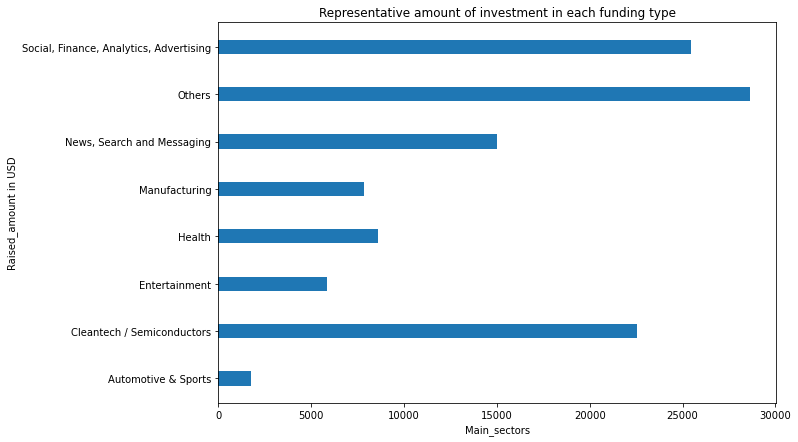

In [396]:
#A plot showing the representative amount of investment in each funding type. This chart should make it clear
#that a certain funding type (FT) is best suited for Spark Funds.
df=master_frame.pivot_table(values='raised_amount_usd',index='main_sector',aggfunc='sum')
m=list(df.index)# converting the index into list

fig = plt.figure(figsize =(10, 7))
plt.barh(m, df['raised_amount_usd'],height=0.3)
plt.xlabel("Main_sectors")
plt.ylabel("Raised_amount in USD")
plt.title("Representative amount of investment in each funding type")

plt.show()

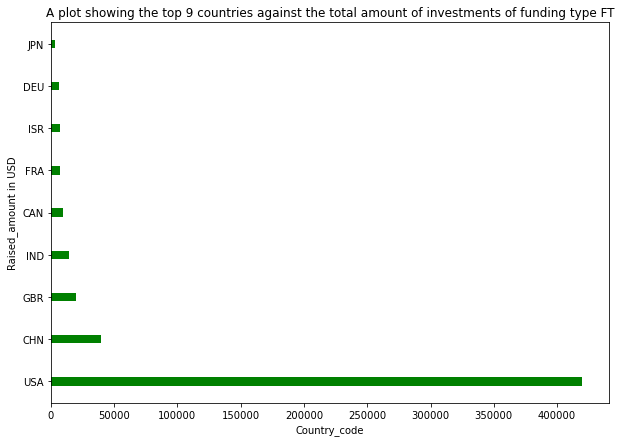

In [393]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT.
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.  
m=list(top9.index)# converting the index into list

fig = plt.figure(figsize =(10, 7))
plt.barh(m, top9['raised_amount_usd'],height=0.2,color='g')
plt.xlabel("Country_code")
plt.ylabel("Raised_amount in USD")
plt.title("A plot showing the top 9 countries against the total amount of investments of funding type FT")

plt.show()

In [368]:
#A plot showing the number of investments in the top 3 sectors 
#of the top 3 countries on one chart (for the chosen investment type FT).
#This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [369]:
master_frame.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=(False))

main_sector
Others                                     3207
Social, Finance, Analytics, Advertising    2907
Cleantech / Semiconductors                 2448
News, Search and Messaging                 1707
Health                                      952
Manufacturing                               862
Entertainment                               680
Automotive & Sports                         196
Name: raised_amount_usd, dtype: int64

In [370]:
#creating a dataframe that has the top 3 sectors
df=master_frame[(master_frame['main_sector']=='Others')|(master_frame['main_sector']=='Social, Finance, Analytics, Advertising')
                |(master_frame['main_sector']=='Cleantech / Semiconductors')]

In [371]:
df.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,country_code,main_sector
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900000,/organization/0xdata,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
17,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11.999347,/organization/128-technology,128 Technology,Service Providers,USA,Others
29,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14.000000,/organization/170-systems,170 Systems,Software,USA,Others
31,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5.000000,/organization/17zuoye,17zuoye,Education,USA,Others
32,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,01-09-2013,10.000000,/organization/17zuoye,17zuoye,Education,USA,Others


In [372]:
df1=df.pivot_table(values='raised_amount_usd',columns='country_code',index='main_sector',aggfunc='count')


In [375]:

df1.head()

country_code,GBR,IND,USA
main_sector,,,
Cleantech / Semiconductors,128,20,2300
Others,147,110,2950
"Social, Finance, Analytics, Advertising",133,60,2714


<AxesSubplot:xlabel='country_code', ylabel='main_sector'>

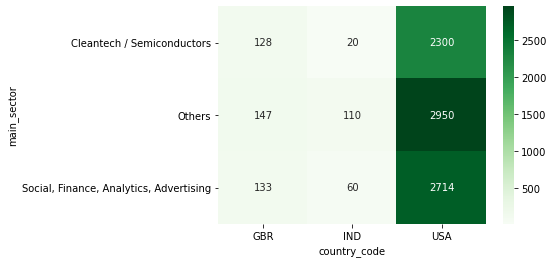

In [394]:
sns.heatmap(df1,cmap='Greens',annot=True,fmt='d')

In [397]:
top9

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


## Recommendation

1. The company should invest in "Venture" funding type.
2. The company should invest in USA, Great Britain, India.
3. The company should invest in following sectors:
    Social,Finance,Analytics,Advertising , Cleantech/Semiconductors and   News,Search and Messaging